The goal of this exercice is to test simple NN on an image dataset (to observe the inefficiency of dense neural nets on 2D data such as images).

We are using fashion-mnist dataset from keras.

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

In [6]:
X_train[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [7]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
encoded_classes = label_encoder.fit_transform(classes)

In [11]:
encoded_classes

array([8, 9, 4, 3, 2, 5, 6, 7, 1, 0])

In [12]:
decoded = label_encoder.inverse_transform(encoded_classes)
decoded

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

y = 6, it's a 'Shirt' picture.


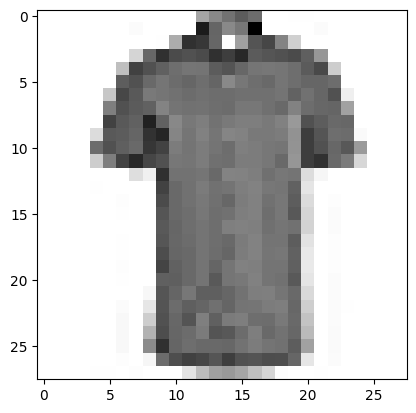

In [13]:
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[index], cmap='gray_r')

label = y_train[index]

class_name = decoded[label]

print(f"y = {label}, it's a '{class_name}' picture.")

---

In [14]:
sample = 2000
X_train, y_train = X_train[:sample, :, :], y_train[:sample]

In [15]:
X_train.shape, y_train.shape

((2000, 28, 28), (2000,))

In [16]:
X_train.max(), X_train.min()

(255, 0)

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
a = to_categorical([1, 3, 2, 1], num_classes=4)
a

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [19]:
to_categorical(y_train).shape

(2000, 10)

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
X_train.reshape((2000, X_train.shape[1]*X_train.shape[2])).shape

(2000, 784)

In [22]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling

In [23]:
# Building a simple architecture
def model(input_shape=None, n_classes=10):
    model = Sequential(
        [
            Input(shape=(input_shape)),
            Flatten(),
            Rescaling(scale=1./255),
            Dense(64, activation='relu'),
            Dense(32, activation='tanh'),
            Dense(16, activation='relu'),
            Dense(n_classes, activation='softmax')
        ]
    )
    return model

In [24]:
model = model(input_shape=X_train.shape[1:], n_classes=y_train.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])

In [27]:
history = model.fit(x=X_train, y=y_train, validation_split=.2, epochs=50, batch_size=32)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2960 - f1_score: 0.2160 - loss: 1.9975 - val_accuracy: 0.5150 - val_f1_score: 0.4434 - val_loss: 1.2944
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5712 - f1_score: 0.5093 - loss: 1.1858 - val_accuracy: 0.7275 - val_f1_score: 0.7231 - val_loss: 0.8994
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7341 - f1_score: 0.7184 - loss: 0.8453 - val_accuracy: 0.7600 - val_f1_score: 0.7495 - val_loss: 0.7388
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - f1_score: 0.7716 - loss: 0.6910 - val_accuracy: 0.7325 - val_f1_score: 0.7135 - val_loss: 0.6731
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - f1_score: 0.7970 - loss: 0.5623 - val_accuracy: 0.7950 - val_f1_score: 0.7878 - val_loss: 0.6419
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - f1_score: 0.8164 - loss: 0.5269 - val_accuracy: 0.7875 - val_f1_score: 0.7781 - val_loss:

In [28]:
# Model evaluation
loss, accuracy, f1_score = model.evaluate(X_test, y_test, verbose=0)
print('Loss is:', loss)
print('Accuracy is:', accuracy)
print('F1-score is:', f1_score)

Loss is: 0.8799391388893127
Accuracy is: 0.7924000024795532
F1-score is: tf.Tensor(
[0.76467586 0.9565656  0.63641584 0.8128     0.6750231  0.87875646
 0.5460899  0.876556   0.91993874 0.8841044 ], shape=(10,), dtype=float32)


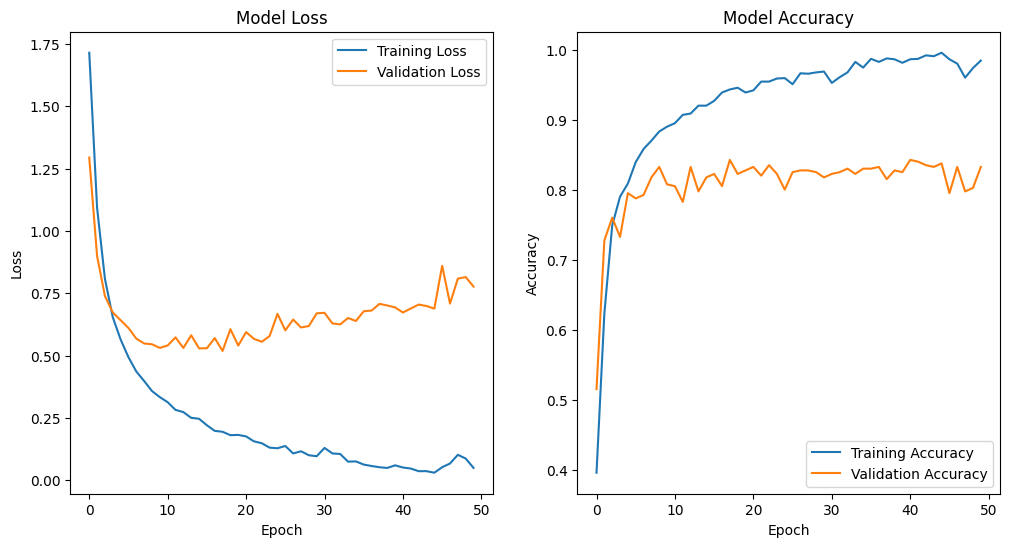

In [29]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history.get('accuracy'), label='Training Accuracy')
plt.plot(history.history.get('val_accuracy'), label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

Our model is not only inefficient but is also overfitting. Overfitting can be solved by some experimentations such as modifying hyperparameters, but the efficiency of the model depends on the architecture chosen for this task.

Deep dense nets are computing gradients for each data point and in every pass on the training data, instead of extracting important features from images (pixels). Convolutional Neural Networks are much more efficient in extracting information from images, i will be using them for deep learning tasks on images.

---

## Simple ML

In order to compare your results with more traditional machine learning methods, i will use a PCA followed by a classification model.

In [43]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve


def flatten(X):
    return X.copy().reshape(X.shape[0], np.prod(X.shape[1:]))

pipe = Pipeline([
    ('flatten', FunctionTransformer(flatten)),
    ('scaler', MinMaxScaler()),
    ('reduce', PCA(n_components=.7)),
    ('model', GradientBoostingClassifier(n_estimators=20, validation_fraction=0.3, random_state=0))
])

ml = pipe.fit(X_train, y_train.argmax(axis=1))

In [44]:
pipe

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function flatten at 0x346310c10>)),
                ('scaler', MinMaxScaler()), ('reduce', PCA(n_components=0.7)),
                ('model',
                 GradientBoostingClassifier(n_estimators=20, random_state=0,
                                            validation_fraction=0.3))])

In [45]:
print(classification_report(y_test[:2_000].argmax(axis=1), ml.predict(X_test[:2_000, :, :])))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       200
           1       0.94      0.84      0.89       203
           2       0.62      0.55      0.58       214
           3       0.70      0.81      0.75       190
           4       0.58      0.58      0.58       219
           5       0.73      0.83      0.78       195
           6       0.36      0.41      0.38       197
           7       0.83      0.74      0.78       200
           8       0.91      0.79      0.85       194
           9       0.84      0.87      0.85       188

    accuracy                           0.71      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.71      0.72      2000



In [33]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

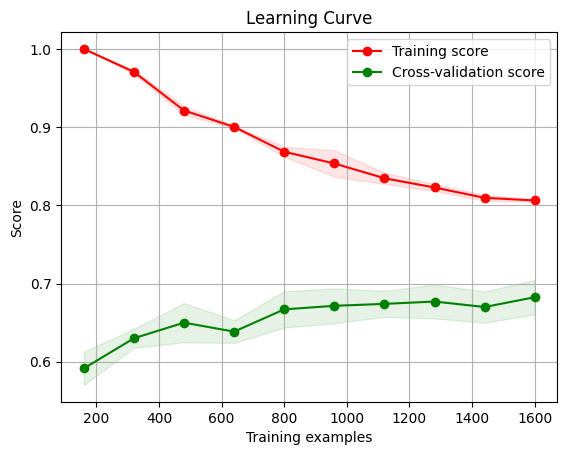

In [42]:
# Plotting the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train.argmax(axis=1),
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the cross-validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()